In [1]:
import cv2 as cv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helper_functions import read_imgs, get_bounding_rect_coor

In [ ]:
def handwritingExtract(file_path):
    img = plt.imread(file_path)
#     cv.imshow("Original", img)
#     cv.waitKey(0)
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
#     cv.imshow("s", s)
#     cv.waitKey(0)
    # inverted = cv.bitwise_not(s)
    # cv.imshow("Inverted", inverted)
    inverted = s

    ret, th = cv.threshold(inverted, 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
#     cv.imshow("Threshold", th)
#     cv.waitKey(0)
    # closeKernel = np.ones((10, 10), np.uint8)
    # closed = cv.morphologyEx(th, cv.MORPH_CLOSE, closeKernel, iterations=1)
    dilateKernel = np.ones((1, 30), np.uint8)
    dilated = cv.dilate(th, dilateKernel)
#     cv.imshow("Dilated", dilated)
    contours, hierarchy = cv.findContours(dilated, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    imgShape = img.shape
    validContours = []
    for contour in contours:
        area = cv.contourArea(contour)
        x, y, w, h = cv.boundingRect(contour)
        if area > 100 and (y > 0.80 * imgShape[0] or y + h < 0.20 * imgShape[0]):
            validContours.append(contour)

    contourImg = np.copy(img)
    cv.drawContours(contourImg, validContours, -1, (0, 255, 0), 3)
    cv.line(contourImg, (0, int(0.8 * imgShape[0])), (imgShape[1], int(0.8 * imgShape[0])), (255, 0, 0))
    cv.line(contourImg, (0, int(0.2 * imgShape[0])), (imgShape[1], int(0.2 * imgShape[0])), (255, 0, 0))
#     cv.imshow("Contours", contourImg)
#     cv.waitKey(0)

    candidates = []
    for contour in validContours:
        x, y, w, h = cv.boundingRect(contour)
        candidate = img[y:y+h, x:x+w]
        candidates.append(candidate)
#         cv.imshow("candidate", candidate)
#         cv.waitKey(0)
#     cv.destroyAllWindows()
    return candidates

In [ ]:
candidates = handwritingExtract(r"C:\Users\Asus\Downloads\nus-sds-dsc2021\train_data\train_images\1063.jpg")

In [ ]:
for candidate in candidates:
    cv.imshow("candidate", candidate)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
digit_img = cv.resize(cv.cvtColor(candidates[-1], cv.COLOR_BGR2GRAY),(200, 200))

In [ ]:
hist = cv.calcHist([digit_img],[0],None,[10],[0,256])
hist

In [ ]:
# 1034, 375
plt.hist(digit_img.ravel(),10,[0,256]); plt.show()
cv.imshow("candidate", digit_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
cv.imshow("candidate", digit_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
img_dict = read_imgs(r"C:\Users\Asus\Downloads\nus-sds-dsc2021\train_data\train_images")

In [ ]:
# 32 for merge issue
img = cv.resize(img_dict[1002].copy(), (396, 549))
count = 0

lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
l, a, b = cv.split(lab)

# ret, th = cv.threshold(b, 135, 255, cv.THRESH_BINARY);
ret, th = cv.threshold(b, 0, 255, cv.THRESH_OTSU);

contours, hierarchy = cv.findContours(th, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(img)

for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.01 * cv.arcLength(cnt, True), True)
    area = cv.contourArea(approx)
    if 150 < area:
        cv.drawContours(mask, [approx], -1, (0, 255, 0), 1)
        count += area//100
    elif 50 < area < 150:
        cv.drawContours(mask, [approx], -1, (0, 0, 255), 1)
        count += 1
    else:
        cv.drawContours(mask, [approx], -1, (255, 0, 0), 1)

min_x, min_y, max_x, max_y = get_bounding_rect_coor(contours)
mask = cv.rectangle(mask, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2) 


print(count)

In [ ]:
th = cv.cvtColor(th, cv.COLOR_GRAY2BGR)
b = cv.cvtColor(b, cv.COLOR_GRAY2BGR)
cv.imshow("window", cv.hconcat([th, img, mask]))
# cv.imshow("window", mask)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
th = cv.bitwise_not(th)
im = cv.bitwise_and(img, img, mask=th)
lab= cv.cvtColor(im, cv.COLOR_BGR2LAB)
l, a, b = cv.split(lab)
ret, th = cv.threshold(b, 0, 255, cv.THRESH_OTSU);
th = cv.bitwise_not(th)
contours, hierarchy = cv.findContours(th, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_SIMPLE)
contours = [cnt for cnt in contours if cv.contourArea(cnt) < 1000]

mask = np.zeros_like(img)
    
cv.drawContours(mask, contours, -1, (0, 255, 0), 1)

th = cv.cvtColor(th, cv.COLOR_GRAY2BGR)
b = cv.cvtColor(b, cv.COLOR_GRAY2BGR)
min_x, min_y, max_x, max_y = get_bounding_rect_coor(contours)
mask = cv.rectangle(mask, (min_x, min_y), (max_x, max_y), (255, 255, 255), 1)
roi = cv.resize(img[min_y:max_y, min_x:max_x], (200,200))
cropped_mask = cv.resize(mask[min_y:max_y, min_x:max_x], (200,200))

In [ ]:
cv.imshow("window", th)
# cv.imshow("window", mask)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
from random import randint

In [9]:
# save the final model to file
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    global extraX
    global extraY
    # load dataset
    (train_x, train_y), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    train_y = to_categorical(train_y)
    testY = to_categorical(testY)
    trainX = train_x[:1000]
    trainY = train_y[:1000]
    testX = testX[:300]
    testY = testY[:300]
    extraX = train_x[1000:1100]
    extraY = train_y[1000:1100]
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    global model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 84, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1000, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
#     trainX, trainY, testX, testY = load_dataset()
    trainX, trainY, testX, testY = new_trainX, new_trainY, new_testX, new_testY
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX, trainY, epochs=5, batch_size=32, verbose=1)
    # save model
#     model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

Epoch 1/5
469/469 [==============================] - 42s 90ms/step - loss: 3.3244 - accuracy: 0.4217
Epoch 2/5
469/469 [==============================] - 49s 105ms/step - loss: 2.0229 - accuracy: 0.6383
Epoch 3/5
469/469 [==============================] - 47s 101ms/step - loss: 1.1534 - accuracy: 0.7428
Epoch 4/5
469/469 [==============================] - 47s 101ms/step - loss: 0.6046 - accuracy: 0.8371
Epoch 5/5
469/469 [==============================] - 47s 100ms/step - loss: 0.3336 - accuracy: 0.9033


In [10]:
results = model.evaluate(new_testX, new_testY, batch_size=128)

36/36 [==============================] - 3s 93ms/step - loss: 1661.1499 - accuracy: 0.4736


In [11]:
ret = model.predict(new_testX)

(array([45], dtype=int64),)
(array([48], dtype=int64),)


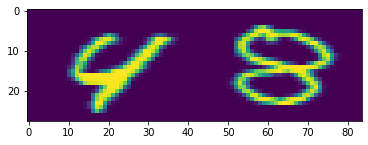

In [22]:
i = 2345
print(np.where(ret[i] == 1))
print(np.where(new_testY[i] == 1))
plt.imshow(new_testX[i])

In [3]:
trainX, trainY, testX, testY = load_dataset()

In [7]:
new_trainY = np.zeros((15000, 1000))
new_trainX = np.zeros((15000, 28, 84, 1))
new_testY = np.zeros((4500, 1000))
new_testX = np.zeros((4500, 28, 84, 1))

In [8]:
for idx in range(5000):
    i = randint(0, 999)
    x_entry = trainX[i].reshape((28, 28, 1))
    x_entry = cv.resize(x_entry, (84, 28)).reshape((28, 84, 1))
    y_index = np.where(trainY[i] == 1)[0][0]
    new_trainX[idx] = x_entry
    new_trainY[idx][y_index] = 1

for idx in range(5000, 10000):
    i = randint(0, 999)
    j = randint(0, 999)
    x_entry = cv.hconcat([trainX[i], trainX[j]]).reshape((28, 56, 1))
    x_entry = cv.resize(x_entry, (84, 28)).reshape((28, 84, 1))
    y_index = np.where(trainY[i] == 1)[0][0]*10 + np.where(trainY[j] == 1)[0][0]
    new_trainX[idx] = x_entry
    new_trainY[idx][y_index] = 1
    
for idx in range(10000, 15000):
    i = randint(0, 999)
    j = randint(0, 999)
    k = randint(0, 999)
    x_entry = cv.hconcat([trainX[i], trainX[j], trainX[k]]).reshape((28, 84, 1))
    x_entry = cv.resize(x_entry, (84, 28)).reshape((28, 84, 1))
    y_index = np.where(trainY[i] == 1)[0][0]*100 + np.where(trainY[j] == 1)[0][0]*10 + np.where(trainY[k] == 1)[0][0]
    new_trainX[idx] = x_entry
    new_trainY[idx][y_index] = 1
    
for idx in range(1500):
    i = randint(0, 299)
    x_entry = trainX[i].reshape((28, 28, 1))
    x_entry = cv.resize(x_entry, (84, 28)).reshape((28, 84, 1))
    y_index = np.where(testY[i] == 1)[0][0]
    new_testX[idx] = x_entry
    new_testY[idx][y_index] = 1

for idx in range(1500, 3000):
    i = randint(0, 299)
    j = randint(0, 299)
    x_entry = cv.hconcat([testX[i], testX[j]]).reshape((28, 56, 1))
    x_entry = cv.resize(x_entry, (84, 28)).reshape((28, 84, 1))
    y_index = np.where(testY[i] == 1)[0][0]*10 + np.where(testY[j] == 1)[0][0]
    new_testX[idx] = x_entry
    new_testY[idx][y_index] = 1
    
for idx in range(3000, 4500):
    i = randint(0, 299)
    j = randint(0, 299)
    k = randint(0, 299)
    x_entry = cv.hconcat([testX[i], testX[j], testX[k]]).reshape((28, 84, 1))
    x_entry = cv.resize(x_entry, (84, 28)).reshape((28, 84, 1))
    y_index = np.where(testY[i] == 1)[0][0]*100 + np.where(testY[j] == 1)[0][0]*10 + np.where(testY[k] == 1)[0][0]
    new_testX[idx] = x_entry
    new_testY[idx][y_index] = 1

In [ ]:
print(np.where(new_trainY[52] == 1))
plt.imshow(new_trainX[52])

In [ ]:
print(np.where(new_testY[2999] == 1))
plt.imshow(new_testX[2999])